# Pandas and Seaborn

If you have not completed the second notebook in this series (01-Jupyter_NumPy_Matplotlib), please take some time to review that first. In this notebook, we will move to importing, manipulating, and saving data. We will also cover the seaborn package for plotting.

# Data 

#### Observations vs Predictors.

Observations (usually represented by rows) are records of measurements (e.g., the different movies in the Netflix challenge problem). 

Predictors (usually represented by columns) are typically different variables for which measurements can be taken.

#### Quantitative vs Qualitative data.

Quantitative data is numerical and defines some measurement. This data can be discrete (as in counting the number of pennies are in your couch) or continuous (as in the temperature outside).

Qualitative data is categorical and usually some attribute is assigned to an observation. For example, eye color would be an example of a qualitative observation.

In [ ]:
# Let's load some of the packages we learned from the last tutorial

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Create some data
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0) 


#use help(np.linspace) to find out what it does.
# what do these functions do?
# what is the shape of x and y?
print(x.shape)
z = np.random.randn(500,6)
print(z.shape)

(500,)
(500, 6)


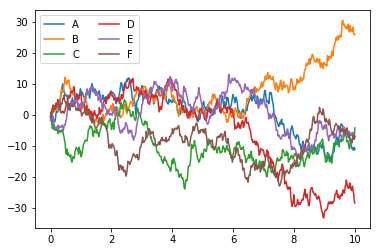

In [19]:
# let's plot the results
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Pandas

1) Pandas is package built upon NumPy's interface in which we can create DataFrame objects and begin looking at data science problems. We can import this package as
    
    import pandas as pd

Let's begin with loading the pandas and numpy package 

In [20]:
import pandas as pd

## Series

Series are one-dimensional arrays of indexed data. You can also think of this as a generalized version of a NumPy array. You can create a series with the following format

    pd.Series(data, index=index)

In [22]:
dat = pd.Series([0,1,2,3,-2])
dat.values

array([ 0,  1,  2,  3, -2])

In [24]:
dat.index

RangeIndex(start=0, stop=5, step=1)

In [26]:
# we can also access elements in dat
print(dat)
dat[0:3]

0    0
1    1
2    2
3    3
4   -2
dtype: int64


0    0
1    1
2    2
dtype: int64

### Series as dictionaries. Dictionaries are objects in which values are accessed by keys/indices. Keys can be strings or integers. 

In [28]:
# let's add an index that is more meaningful
fruits = pd.Series([0.99, 4.99, 2.99],
                   index = ['apples','cherries', 'grapes'])
#
fruits
print(fruits.values)
print(fruits.index)

[ 0.99  4.99  2.99]
Index(['apples', 'cherries', 'grapes'], dtype='object')


In [29]:
# Now, we can access fruit prices by using the appropriate index.
# Adding indices provides a mapping from a collection of keys 
# to a collection of values.
fruits['grapes']

2.9900000000000002

In [33]:
# Adding a key with missing information
#fruits['mangos'] = None #vs 
fruits['mangos'] = np.nan
fruits

apples      0.99
cherries    4.99
grapes      2.99
mangos       NaN
dtype: object

## DataFrames

Just as Series are generalized versions of 1-D NumPy arrays, DataFrames are generalized version of 2-dimensional NumPy arrays.

In [37]:
data = pd.DataFrame(np.random.rand(3, 2),
             columns=['today', 'tomorrow'])
data.columns

Index(['today', 'tomorrow'], dtype='object')

In [39]:
# How do I access information about the data DataFrames?
data['tomorrow']

0    0.988191
1    0.651068
2    0.289839
Name: tomorrow, dtype: float64

In [43]:
# Adding columns to a DataFrame
data['future'] = 0.5*data['tomorrow'] + 0.5*data['today']
data
type(data.values)

numpy.ndarray

In [ ]:
# Checking the type of the DataFrame
# Accessing the values of the array. What is its type?

In [44]:
# Let's create a DataFrame by first making a few Series objects
gas = pd.Series({'CA': 3.700, 'LA': 2.598, 'MD': 2.840, 'TX': 2.701 }) # gas prices/gallon in dollars
pop = pd.Series({'CA': 37.253, 'LA': 4.533, 'MD': 5.773, 'TX': 25.145 }) #population (in millions)

states = pd.DataFrame({'gas':gas, 'pop':pop})
states['pop']

CA    37.253
LA     4.533
MD     5.773
TX    25.145
Name: pop, dtype: float64

In [47]:
test2 = np.zeros(10000).reshape(100,100)
testdat = pd.DataFrame(test2)
testdat;
# Question: How do we relate a Pandas DataFrame to a NumPy Array
#    DataFrames.values

In [ ]:
# Question: How do you view on certain rows?

Indexing values of DataFrames follows a different convention than numpy arrays. They follow the following framework

    data.iloc[x,y] # positional entry
    data.loc['key1','key2'] # entry using the keys

In [50]:
# Let's see how that works in the states data
print(states.iloc[0,1])
print(states.loc['CA','pop'])

37.253
37.253


In [51]:
states.T #transposes data

,CA,LA,MD,TX
gas,3.700,2.598,2.840,2.701
pop,37.253,4.533,5.773,25.145


## Saving Data

In [ ]:
# How do I save data, so I can access it later?

In [52]:
states.to_csv('states_data.csv')

#states.to_csv('states_data.csv',index=False)

In [ ]:
# states.to_csv('states_data.csv')

In [ ]:
# help(states.to_csv)

## Loading and Manipulating Data

Now that we have a better idea on how to save data to a .csv file, let's move on to loading and handling that loaded data.

In [57]:
#newstates = pd.read_csv('states_data.csv')
# what happened to the index??
newstates = pd.read_csv('states_data.csv', index_col='Unnamed: 0')
newstates

,gas,pop
CA,3.700,37.253
LA,2.598,4.533
MD,2.840,5.773
TX,2.701,25.145


In [67]:
# Now that you have loaded this data, calculate the mean and median
#print(newstates)

np.mean(newstates)
#np.median(newstates)
#help(np.median)
np.median(newstates,axis=0)
#np.median(newstates)
#help(np.median)

array([  2.7705,  15.459 ])

In [68]:
# Question: Do universal functions (Ufuncs) work on DataFrames?
newstates + 1

,gas,pop
CA,4.700,38.253
LA,3.598,5.533
MD,3.840,6.773
TX,3.701,26.145


In [69]:
# There are some commands you can use in pandas to change the values
newstates.loc[newstates.gas > 3.0, 'pop'] = 0
# change values of population to 0 when gas is greater than 3.0
newstates

,gas,pop
CA,3.700,0.000
LA,2.598,4.533
MD,2.840,5.773
TX,2.701,25.145


## Handling Missing Data

If a variable or an entry in a DataFrame is missing, typically this will be represented as a 

    None
or in numpy, it will be 

    NaN
which stands for Not a Number. You can change data to be these types and we will see this below.

In [72]:
x = None
y = np.nan
# try adding or multiplying numbers to x and y now.
# What is another difference between x and y?
y+1

nan

In [81]:
# The pandas package has a few ways to handle missing data in a matrix
a = np.ones(25).reshape(5,5)

#a = np.random.randn(25).reshape(5,5)
b = pd.DataFrame(a)
b.loc[2,1] = np.nan
b

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,NaN,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0


In [82]:
# Let's check which entries have a NaN or None value.
b.isnull()

,0,1,2,3,4
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [83]:
b.dropna() # what happened?

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0


In [92]:
b.dropna(axis='columns')
#b.dropna(axis='columns', how='all') #vs. 
b.dropna(axis='columns', how='any')

# Let's add another NaN in the same row
b.loc[2,3] = np.nan
b
b.dropna(axis='rows',thresh=4)
# drop NAs along rows if there is less than four non-NA entries 
# thresh counts the entries, not the NAs
# try the same but with the columns axis

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,NaN,1.0,NaN,1.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0


Dropping NAs (None and NaN) is definitely one way to deal with missing data. 

#### What is potentially another way to deal with this problem?

Awesome ideas by MSRI-UP students!

1) We can replace NAs with average of surrounding values.

2) We can replace NAs with 0s.

3) We can replace with the mode, random numbers, (look for similar columns) 

In [99]:
b.fillna(0) # fill with a specific value. In this case, 0

#b.fillna('Did not take the test')
b.fillna(method='ffill') # fill with the value from ?
#b.fillna(method='bfill')
#help(b.fillna)
# Ex. Try making another dataframe that is not all 1's and use fillna!

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0


## Plotting with Seaborn

Seaborn is another Python package we can use for plotting

In [102]:
import seaborn as sns

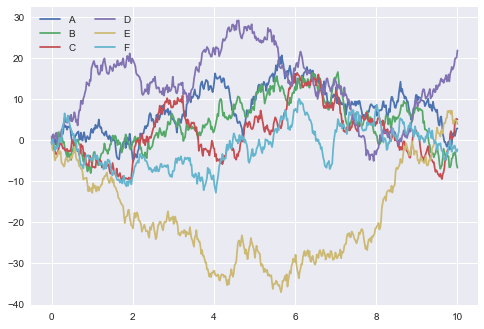

In [105]:
# same plotting code as above!
p = np.linspace(0, 10, 500)
q = np.cumsum(np.random.randn(500, 6), 0) 

plt.plot(p, q)
plt.legend('ABCDEF', ncol=2, loc='upper left');

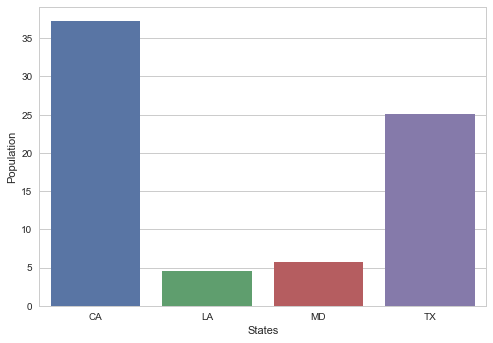

In [109]:
#print(states.loc[:,'pop'])
#print(states.index)
sns.set_style("whitegrid")
myfig = sns.barplot(x=states.index, y='pop', data=states)
# Let's rewrite the labels assigned
myfig.set(xlabel='States', ylabel='Population');

In [110]:
# Python also has some prebuilt datasets
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


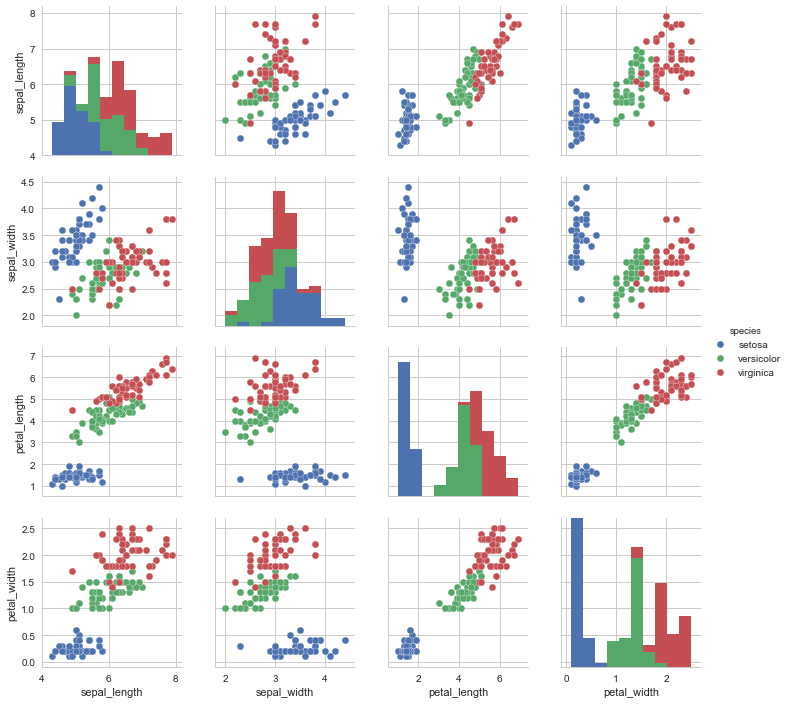

In [114]:
sns.pairplot(iris, size=2.5, hue='species');

In [ ]:
help(plt.hist)

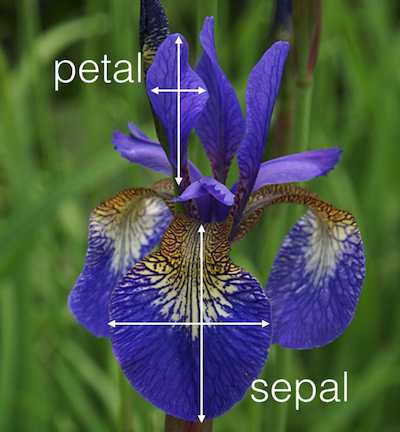

In [111]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image('/Users/mariob/Desktop/iris_petal_sepal.png')

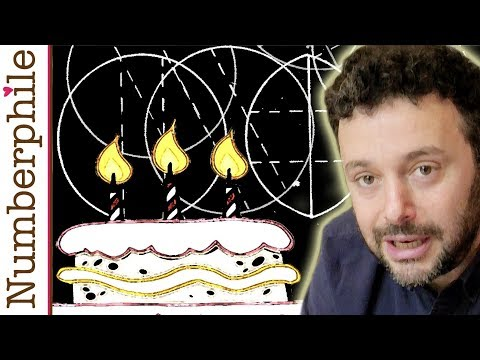

In [112]:
YouTubeVideo('wBU9N35ZHIw')